In [ ]:
KNN Classifier

In [1]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import re
import nltk
from nltk.stem import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from PIL import _imaging
from sklearn.svm import SVC
from numpy import genfromtxt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import csv


def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:, np.argsort(
        np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


data = pd.read_csv('out.csv')
data.head()
df = data
df = df.drop(columns=['Label'])
X = df
print(np.shape(X))
y = data['Label']
print(np.shape(X))


num_feats = 850
feature_name = X.columns.tolist()
cor_support, cor_feature = cor_selector(X, y, num_feats)

our_feature = []

our_feature.append(["Pearson Correlation", cor_feature])


# Chi-Squared
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:, chi_support].columns.tolist()


our_feature.append(["Chi-Squared", chi_feature])

# Recursive Feature Elimination
rfe_selector = RFE(estimator=LogisticRegression(),
                   n_features_to_select=num_feats, step=30, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:, rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')


our_feature.append(["Recursive Feature Elimination", rfe_feature])


# Random Forest

embeded_rf_selector = SelectFromModel(
    RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:, embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

our_feature.append(["Random Forest", embeded_rf_feature])

# LightGBM


lgbc = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
                      reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:, embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

our_feature.append(["LightGBM", embeded_lgb_feature])

(2479, 988)
(2479, 988)
Fitting estimator with 988 features.
Fitting estimator with 958 features.
Fitting estimator with 928 features.
Fitting estimator with 898 features.
Fitting estimator with 868 features.
850 selected features
203 selected features
210 selected features


--------------------------------------- Pearson Correlation ------------------------------
Test Accuracy: 93.01075268817203 %
[[216  13   1]
 [ 30 235   6]
 [  0   2 241]]
	 TP	FP	TN	FN

0.0	 216 	 14 	 484 	 30
1.0	 235 	 36 	 458 	 15
2.0	 241 	 2 	 494 	 7

Classification Report

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       230
         1.0       0.94      0.87      0.90       271
         2.0       0.97      0.99      0.98       243

    accuracy                           0.93       744
   macro avg       0.93      0.93      0.93       744
weighted avg       0.93      0.93      0.93       744



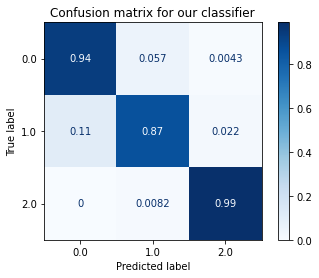

--------------------------------------- Chi-Squared ------------------------------
Test Accuracy: 92.06989247311827 %
[[226  12   1]
 [ 37 219   9]
 [  0   0 240]]
	 TP	FP	TN	FN

0.0	 226 	 13 	 468 	 37
1.0	 219 	 46 	 467 	 12
2.0	 240 	 0 	 494 	 10

Classification Report

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       239
         1.0       0.95      0.83      0.88       265
         2.0       0.96      1.00      0.98       240

    accuracy                           0.92       744
   macro avg       0.92      0.92      0.92       744
weighted avg       0.92      0.92      0.92       744



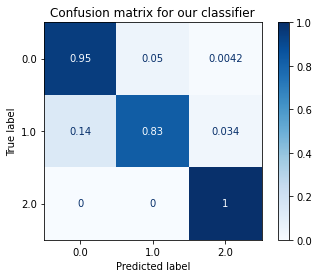

--------------------------------------- Recursive Feature Elimination ------------------------------
Test Accuracy: 90.99462365591397 %
[[229  20   0]
 [ 37 210   9]
 [  0   1 238]]
	 TP	FP	TN	FN

0.0	 229 	 20 	 458 	 37
1.0	 210 	 46 	 467 	 21
2.0	 238 	 1 	 496 	 9

Classification Report

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       249
         1.0       0.91      0.82      0.86       256
         2.0       0.96      1.00      0.98       239

    accuracy                           0.91       744
   macro avg       0.91      0.91      0.91       744
weighted avg       0.91      0.91      0.91       744



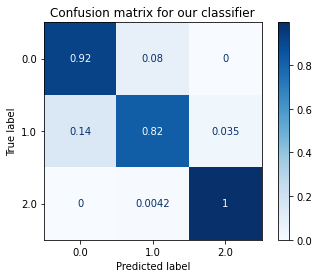

--------------------------------------- Random Forest ------------------------------
Test Accuracy: 93.95161290322581 %
[[244  10   1]
 [ 19 205  13]
 [  0   2 250]]
	 TP	FP	TN	FN

0.0	 244 	 11 	 470 	 19
1.0	 205 	 32 	 495 	 12
2.0	 250 	 2 	 478 	 14

Classification Report

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       255
         1.0       0.94      0.86      0.90       237
         2.0       0.95      0.99      0.97       252

    accuracy                           0.94       744
   macro avg       0.94      0.94      0.94       744
weighted avg       0.94      0.94      0.94       744



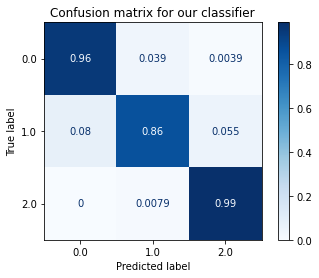

--------------------------------------- LightGBM ------------------------------
Test Accuracy: 95.56451612903226 %
[[239   4   2]
 [ 19 214   7]
 [  0   1 258]]
	 TP	FP	TN	FN

0.0	 239 	 6 	 480 	 19
1.0	 214 	 26 	 499 	 5
2.0	 258 	 1 	 476 	 9

Classification Report

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       245
         1.0       0.98      0.89      0.93       240
         2.0       0.97      1.00      0.98       259

    accuracy                           0.96       744
   macro avg       0.96      0.95      0.95       744
weighted avg       0.96      0.96      0.96       744



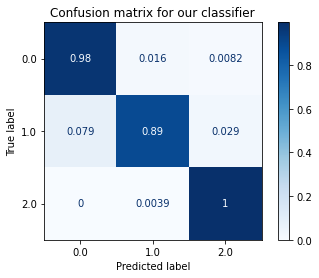

In [3]:
dataset = pd.read_csv('out.csv')

for i in our_feature:
  print("---------------------------------------",
          i[0], "------------------------------")
  temp=i[1]
  Y_ori=np.array(dataset['Label'])
  d=dataset[temp]
  X_ori=np.array(d)

  X_train, X_test, y_train, y_test = train_test_split(X_ori, Y_ori, test_size=0.30)


  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)


  classifier = KNeighborsClassifier(n_neighbors=5)
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  
  
  print("Test Accuracy:", (classifier.score(X_test, y_test.ravel()))*100, "%")
  matrix = plot_confusion_matrix(classifier,
                               X_test,
                               y_test,
                               cmap=plt.cm.Blues,
                               normalize='true')
  
  plt.title('Confusion matrix for our classifier')
  confusion = confusion_matrix(y_test, y_pred)
  
  confusion= confusion.flatten()
  
  print('\t TP\tFP\tTN\tFN')
  print()

  print('0.0\t',confusion[0],'\t',confusion[1]+confusion[2],'\t',confusion[4]+confusion[5]+confusion[7]+confusion[8],'\t',confusion[3]+confusion[6])
  print('1.0\t',confusion[4],'\t',confusion[3]+confusion[5],'\t',confusion[0]+confusion[2]+confusion[6]+confusion[8],'\t',confusion[1]+confusion[7])
  print('2.0\t',confusion[8],'\t',confusion[6]+confusion[7],'\t',confusion[0]+confusion[1]+confusion[3]+confusion[4],'\t',confusion[2]+confusion[5])
  
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred, target_names=['0.0', '1.0', '2.0']))

  plt.show()